In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns # statistical data visualization
from scipy.special import logit, expit

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load and preview data
df = pd.read_csv('Admission_Predict.csv')
df.head()

data_x = df[df.columns[1:8]]
data_y = df.iloc[:, 8]
# print(data_x)
# print(data_y)

# Y = expit(data_y)
# Y = logit(data_y)
Y = data_y
# print(Y)

#  training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.2, random_state=1)

In [4]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
# build XGB
model = XGBRegressor(n_estimators=25, learning_rate=0.3)
# training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print(model.predict(X_train))
# print(y_train)

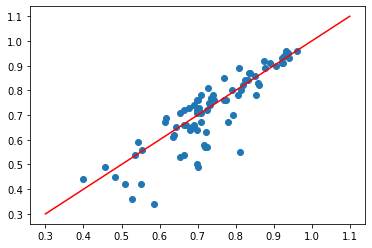

In [5]:
# draw
import matplotlib.pyplot as plt # data visualization
from matplotlib.pyplot import Line2D
# add line
a = 0.3
b = 1.2
x1=np.arange(a,b,0.1)
y1=np.arange(a,b,0.1)
plt.plot(x1,y1,'r')
plt.scatter(y_pred,y_test)
plt.show()

In [6]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mae:", mean_absolute_error(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mae: 0.052307489439845076
mse: 0.005980117227578052
rmse: 0.07733121767810236
r2 score: 0.7414275910343265


In [7]:
print(y_pred)

[0.7797232  0.67991555 0.7907319  0.72790754 0.8508028  0.7177445
 0.70376354 0.55366856 0.53551984 0.9261358  0.83553594 0.93761826
 0.9211634  0.70772153 0.67860895 0.6987708  0.8081874  0.9048926
 0.39926982 0.7086308  0.7200292  0.79296947 0.8609767  0.92983156
 0.6850426  0.58527845 0.691637   0.66336256 0.939153   0.66854906
 0.933658   0.6430719  0.85395324 0.80508584 0.7297058  0.697575
 0.52776533 0.6392299  0.9246881  0.70879436 0.8586873  0.6180403
 0.87588453 0.66298044 0.96253717 0.69867086 0.70151997 0.8136832
 0.6643947  0.690507   0.810481   0.63484836 0.8194821  0.7227986
 0.743235   0.873748   0.45674562 0.48379186 0.7363856  0.7686016
 0.9217538  0.72443104 0.8909622  0.72409755 0.5420362  0.76816624
 0.8381376  0.7738652  0.6994506  0.7392541  0.83351856 0.5503715
 0.73163927 0.6530101  0.8232937  0.5085653  0.7012088  0.6537109
 0.6980523  0.61466944]


In [8]:

# Predict testing
y_new = model.predict(np.array([330,117,4,4,4,8.9,1]).reshape(-1, 7))
print(y_new)

[0.87321883]
